# Set up imports

In [71]:
# setting up our imports
import re, string, unicodedata
import numpy as np
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.models import LsiModel
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger

nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#from bs4 import BeautifulSoup
#from nltk import word_tokenize, sent_tokenize

# Plotting tools 
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
#logging.root.setLevel(level=logging.INFO)
#import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kornelius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kornelius\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# load dataset

In [79]:
# Load dataset
df = pd.read_csv('C:/Users/Kornelius/Desktop/Data 2/nips-papers/papers.csv', header = 0, sep = ';', error_bad_lines=False)
# Drop the columns not needed
df = df.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)
df

,year,title,abstract,paper_text
0,2008,A general framework for investigating how far ...,``How is information decoded in the brain?'' i...,A general framework for investigating how far ...
1,2017,MarrNet: 3D Shape Reconstruction via 2.5D Sket...,3D object reconstruction from a single image i...,MarrNet: 3D Shape Reconstruction via 2.5D Sket...
2,2015,Monotone k-Submodular Function Maximization wi...,A $k$-submodular function is a generalization ...,Monotone k-Submodular Function Maximization\nw...
3,2014,The Large Margin Mechanism for Differentially ...,A basic problem in the design of privacy-prese...,The Large Margin Mechanism\nfor Differentially...
4,2011,Bayesian Partitioning of Large-Scale Distance ...,A Bayesian approach to partitioning distance m...,Bayesian Partitioning of Large-Scale Distance ...
5,2016,Linear dynamical neural population models thro...,A body of recent work in modeling neural activ...,Linear dynamical neural population models thro...
6,2012,Bandit Algorithms boost Brain Computer Interfa...,A brain-computer interface (BCI) allows users ...,Bandit Algorithms boost motor-task selection f...
7,2017,Dynamic Routing Between Capsules,A capsule is a group of neurons whose activity...,Dynamic Routing Between Capsules\n\nSara Sabou...
8,2016,Interpretable Nonlinear Dynamic Modeling of Ne...,A central challenge in neuroscience is underst...,Interpretable Nonlinear Dynamic Modeling\nof N...
9,2016,Deep Learning Models of the Retinal Response t...,A central challenge in sensory neuroscience is...,Deep Learning Models of the Retinal Response t...


In [80]:
# Drop a row by condition
df = df[df.abstract != 'Abstract Missing']
# sort by year
df = df.sort_values(by=['year'])
df

,year,title,abstract,paper_text
6389,1997,A Neural Network Based Head Tracking System,We have constructed an inexpensive video based...,A Neural Network Based\nHead Tracking System\n...
5909,1997,Learning Generative Models with the Up Propaga...,Up-propagation is an algorithm for inverting a...,Learning Generative Models with the\nUp-Propag...
4884,2000,Algorithms for Non-negative Matrix Factorization,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
5281,2001,Characterizing Neural Gain Control using Spike...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
4471,2007,Learning Horizontal Connections in a Sparse Co...,It has been shown that adapting a dictionary o...,Learning Horizontal Connections in a Sparse Co...
4477,2007,Predictive Matrix-Variate t Models,It is becoming increasingly important to learn...,Predictive Matrix-Variate t Models\nShenghuo Z...
4480,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
6095,2007,Progressive mixture rules are deviation subopt...,We consider the learning task consisting in pr...,Progressive mixture rules are deviation subopt...
6085,2007,Adaptive Embedded Subgraph Algorithms using Wa...,We consider the estimation problem in Gaussian...,Adaptive Embedded Subgraph Algorithms using\nW...
3564,2007,Estimating disparity with confidence from ener...,Binocular fusion takes place over a limited re...,Estimating disparity with confidence from ener...


In [81]:
df = df[ df['year'] == 2014 ]

In [82]:
data = df.abstract.values.tolist()

In [83]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(data):
    stop_free = " ".join([i for i in data.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

data = [clean(data).split()for data in data]  

In [84]:
# remove characters and numbers
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [85]:
from nltk.probability import FreqDist
result = str(data_words).strip('[]')
freq = pd.Series(''.join(result).split()).value_counts()
freq
# turn series into df
df = freq.to_frame().reset_index()
df.columns = ['words','counts']
df

,words,counts
0,"'algorithm',",490
1,"'model',",489
2,"'problem',",374
3,"'learning',",348
4,"'method',",344
5,"'data',",273
6,"'show',",264
7,"'approach',",203
8,"'result',",197
9,"'function',",193


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

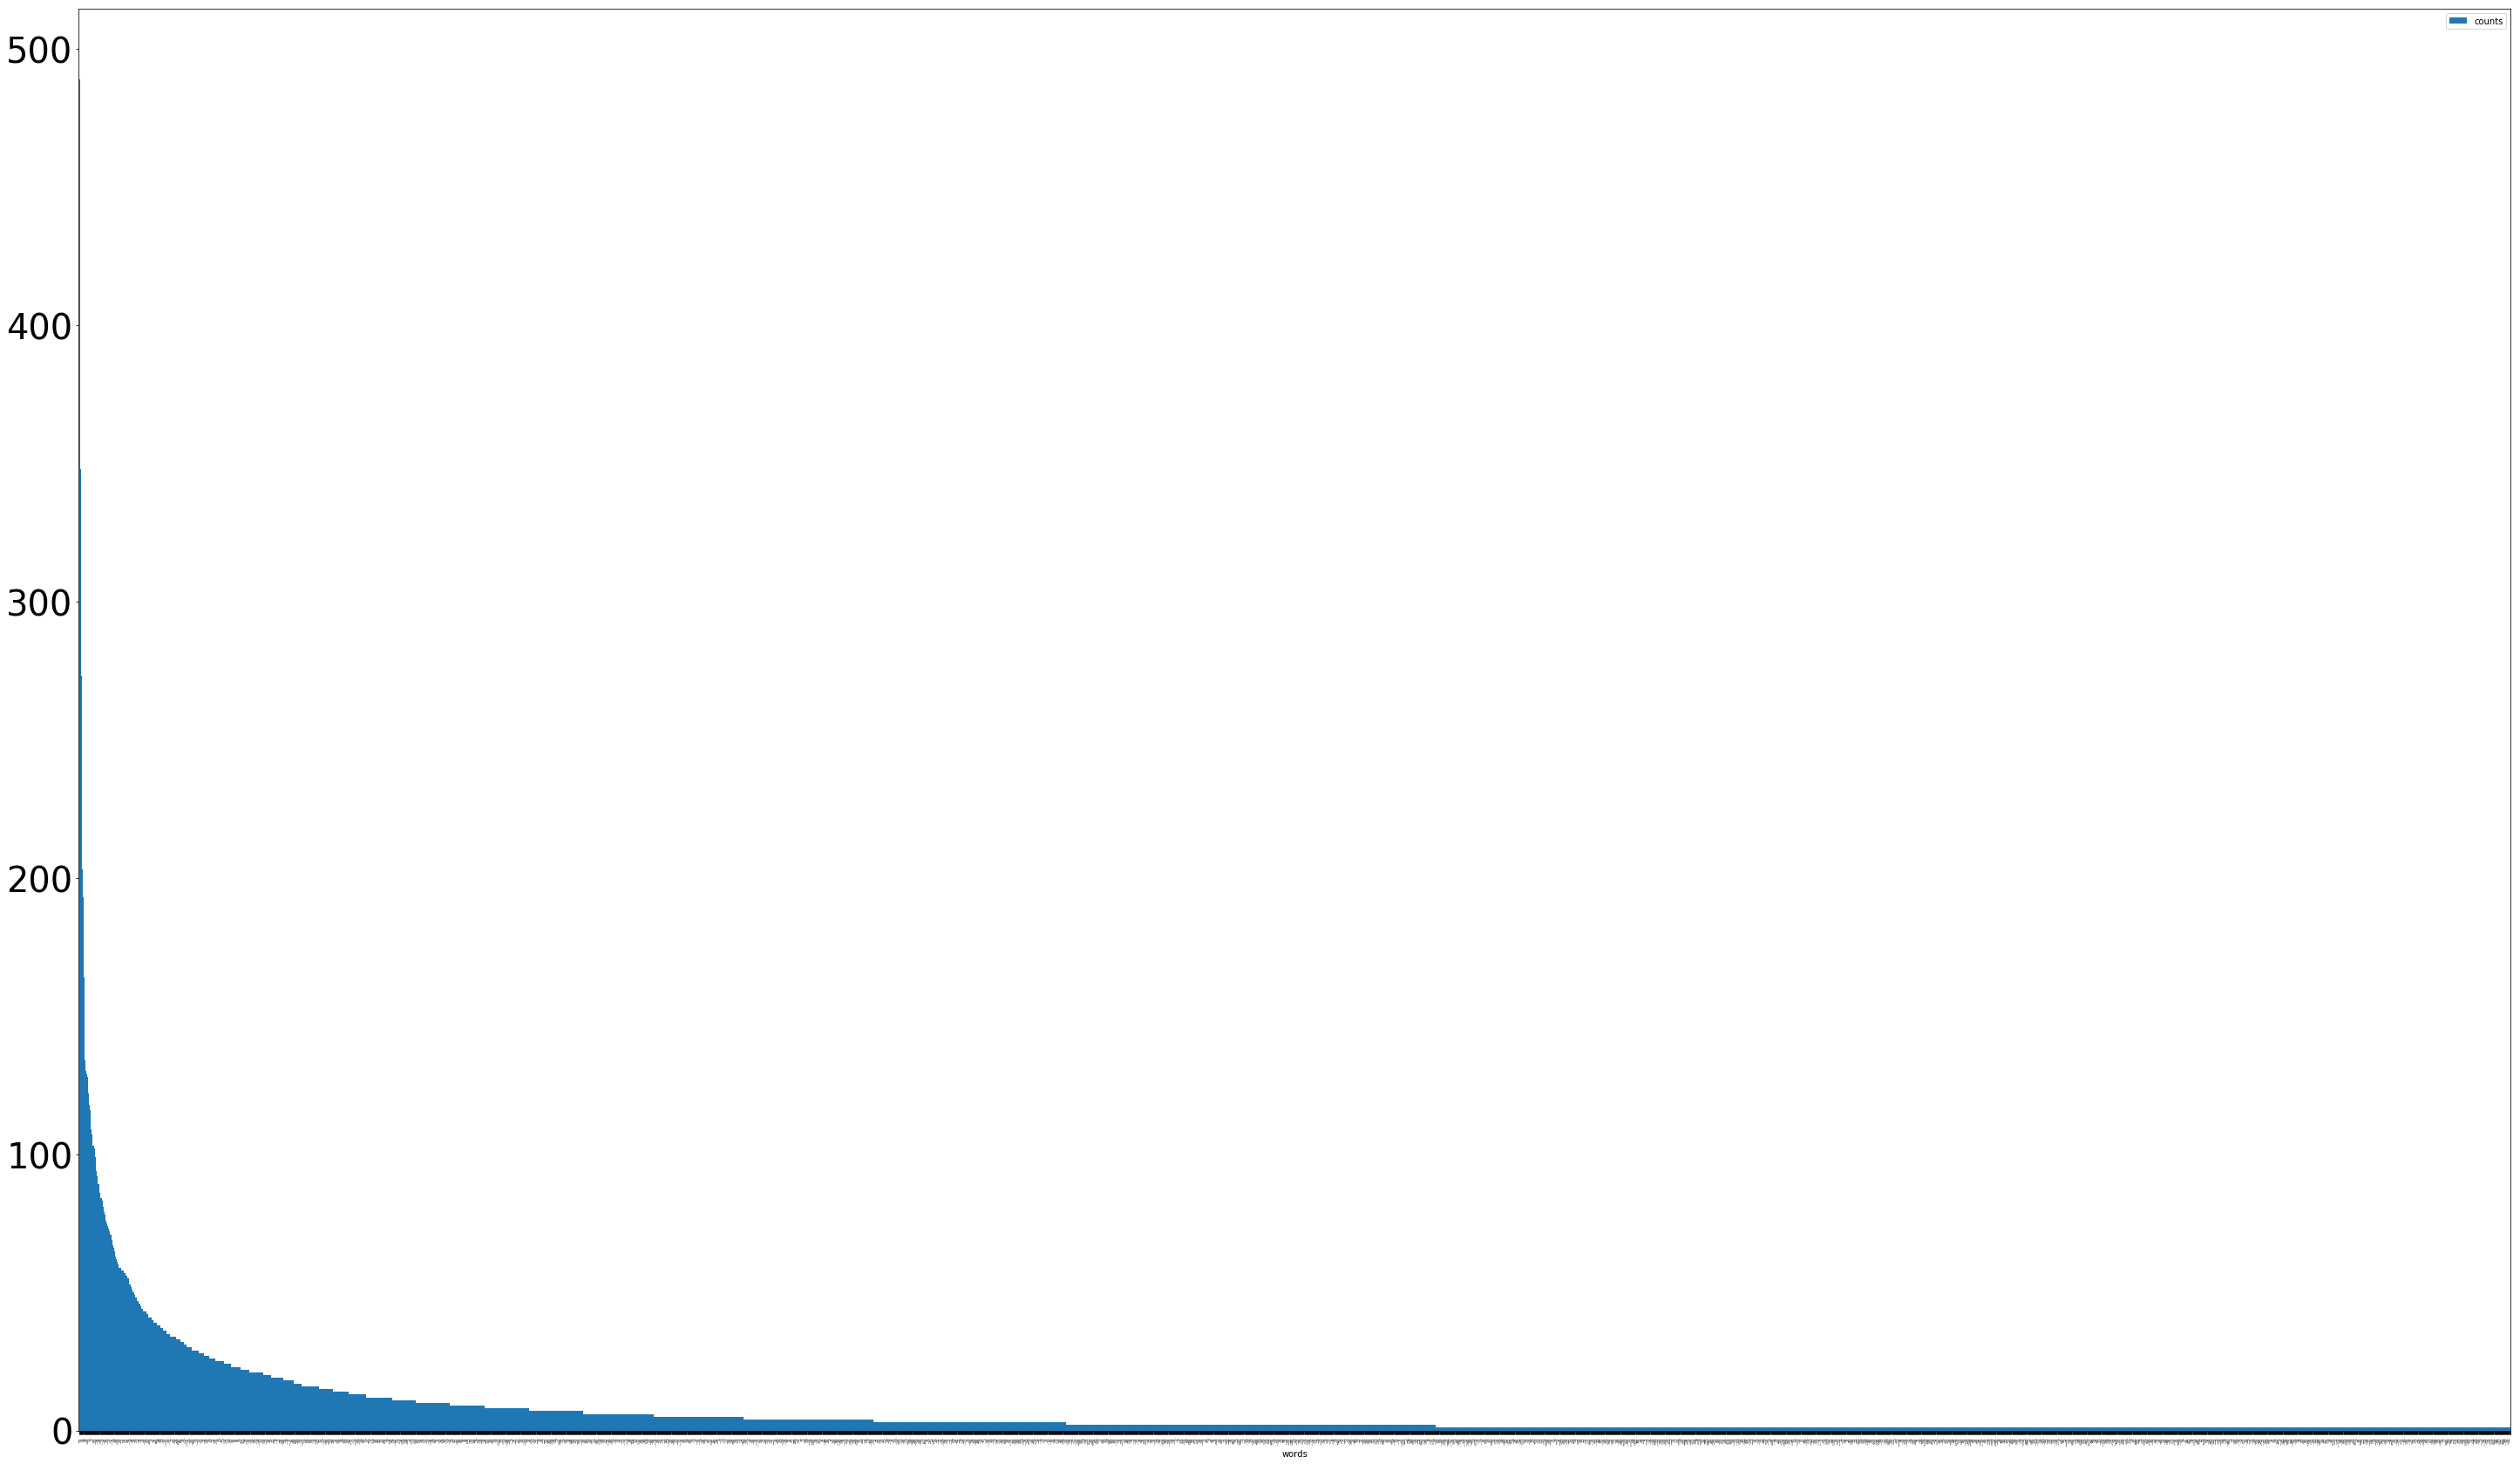

In [86]:
# draw graph
ax = df.plot.bar(x='words', y='counts', rot=0, figsize=(50,30), width=1)


plt.xticks(size = 1)
plt.xticks(rotation=90)
plt.yticks(size = 40)

In [36]:
data = data_words
# Create Dictionary
id2word = corpora.Dictionary(data)
print((id2word))

KeyboardInterrupt: 

In [ ]:
# less than 10 documents,
id2word = corpora.Dictionary(data)
#id2word.filter_n_most_frequent(10)
#id2word.filter_extremes(no_above = 0.90)
#id2word.filter_extremes(no_above = 0.98)
#id2word.filter_extremes(no_above = 0.99)
#id2word.filter_extremes(no_below = 4)
#id2word.filter_extremes(no_below = 10)
#id2word.filter_extremes(no_below = 50)
print((id2word))

In [ ]:
texts = data
# Term Document Frequency and creating corpus
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

vocab_tf={}
for i in corpus:
    for item,count in dict(i).items():
        if item in vocab_tf:
            vocab_tf[item]+=count
        else:
            vocab_tf[item] = count

In [ ]:
dictList= []
for key, value in sorted(vocab_tf.items()):
    dictList.append([key, value])
dictList

In [ ]:
df = pd.DataFrame(dictList) 
df = df.sort_values(ascending = False, by = 1)
df.columns = ['words','counts']
df
Total = df['counts'].sum()

Total


(0.0, 5000)

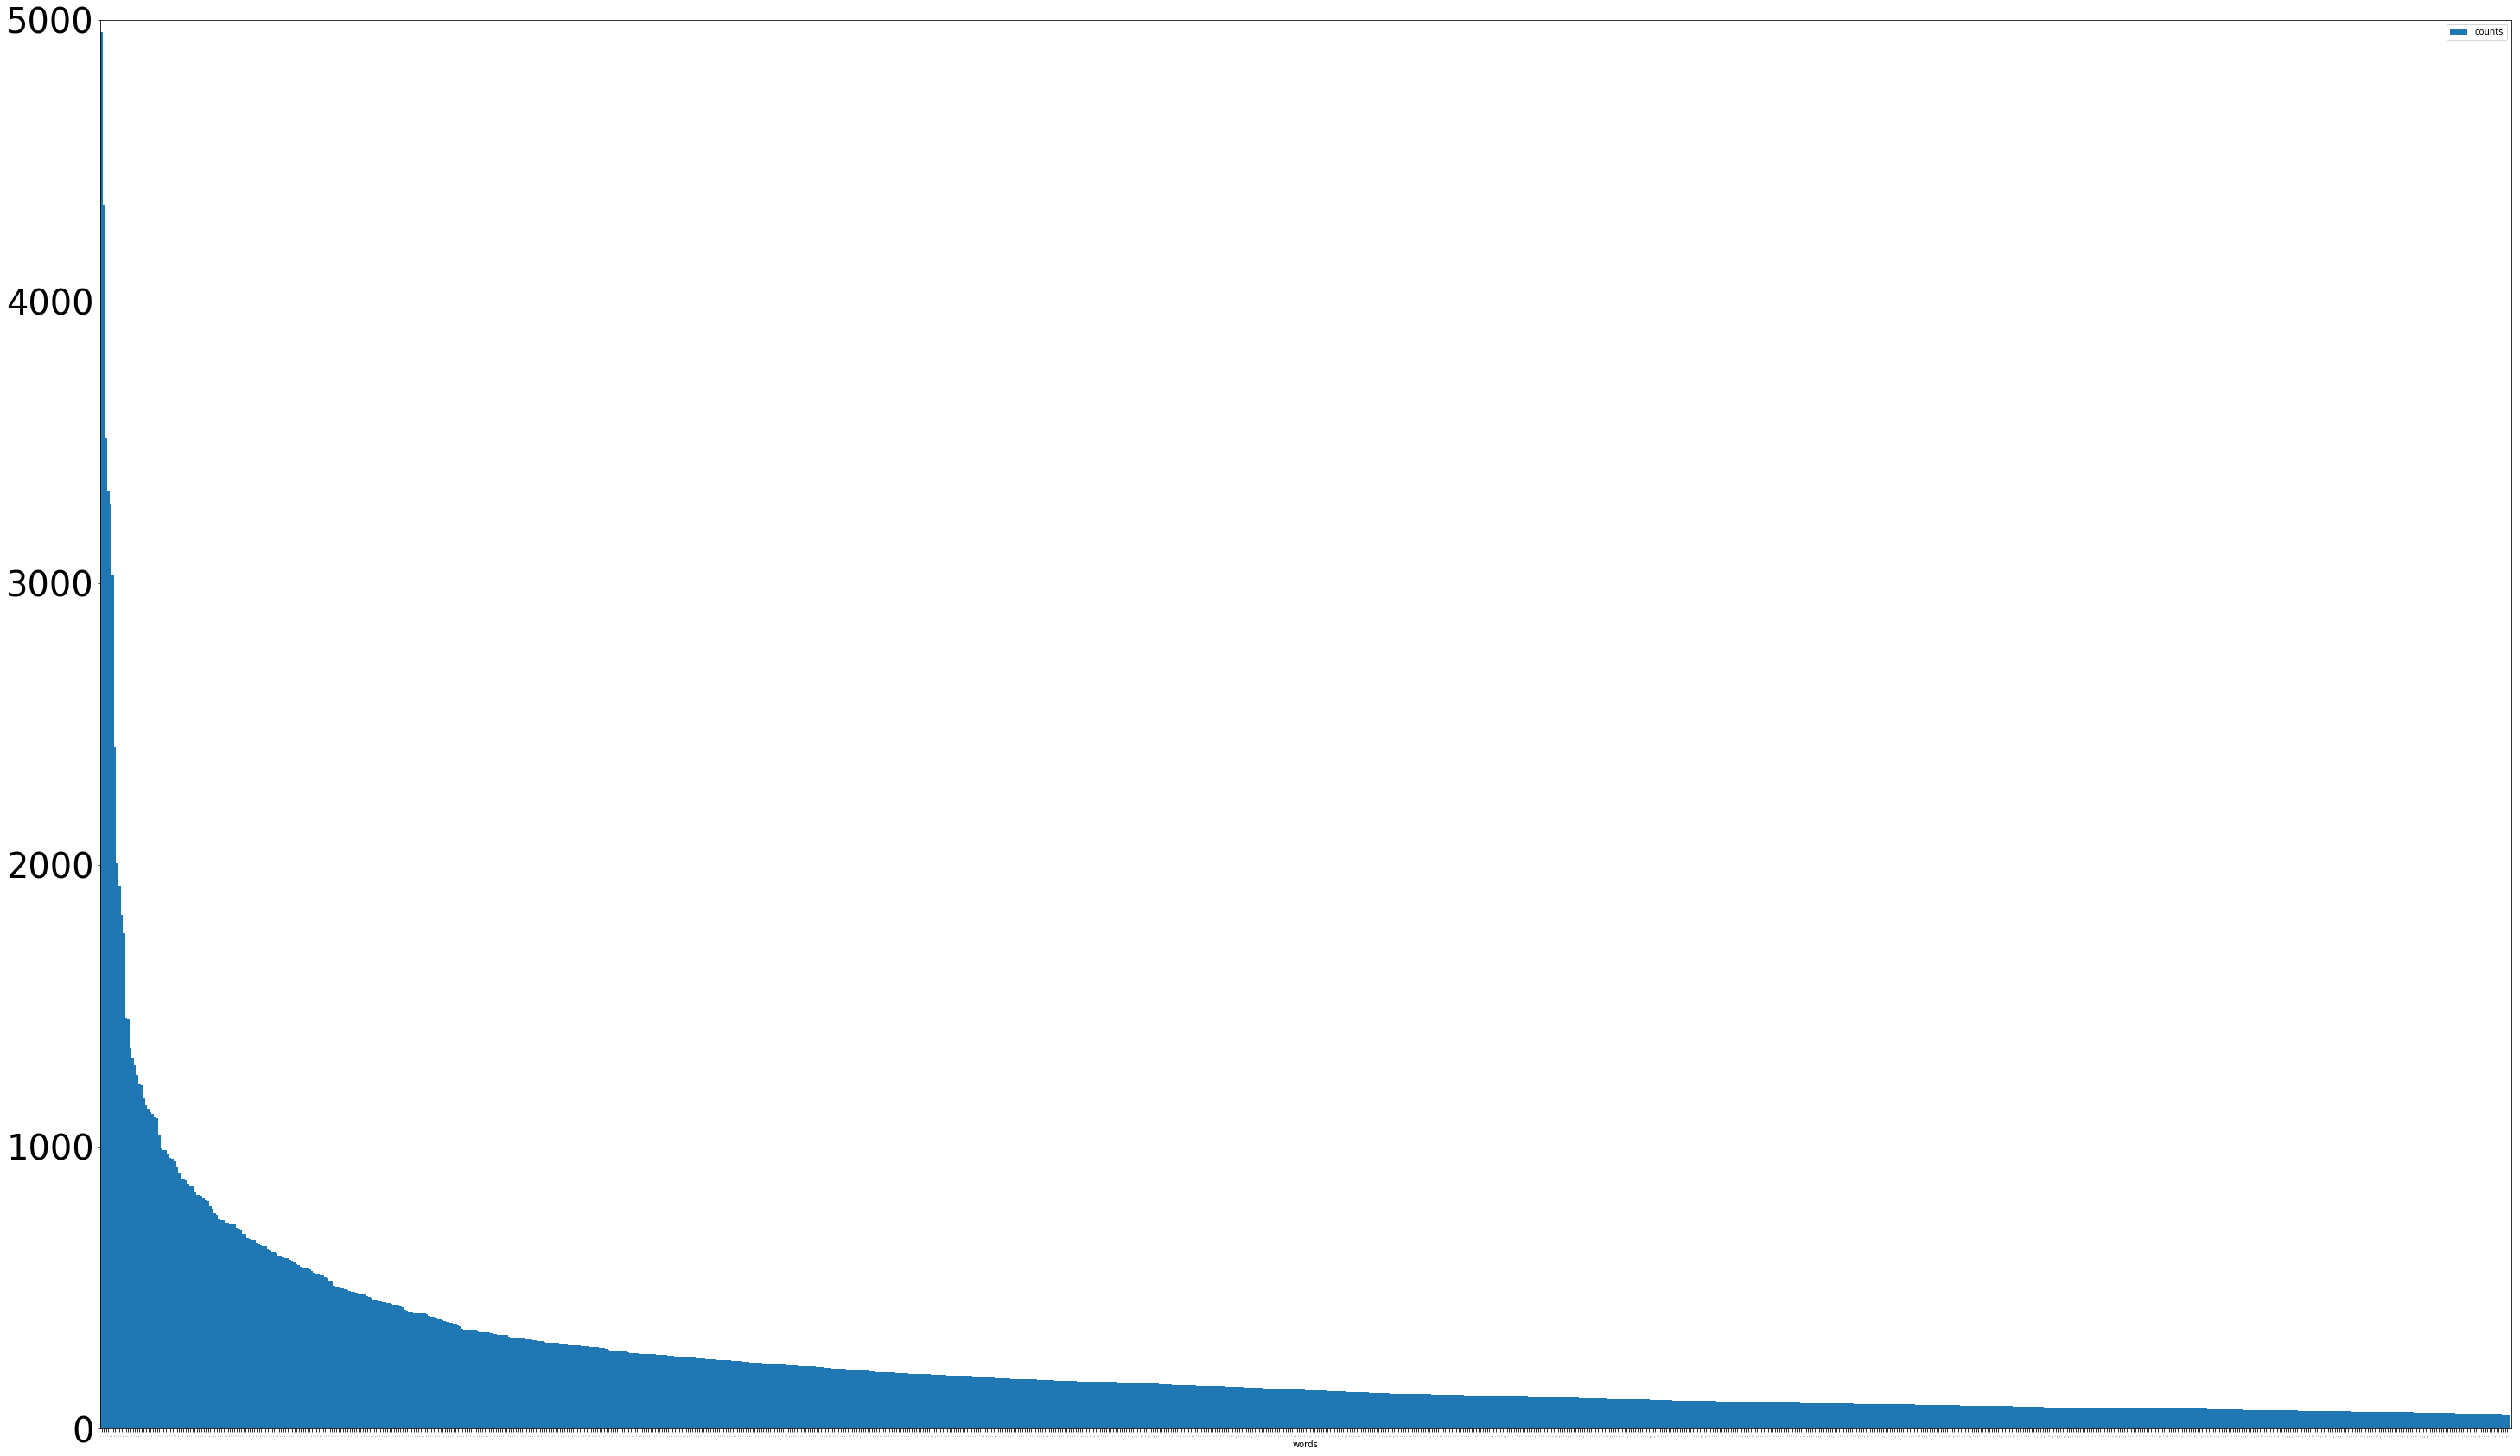

In [81]:
ax = df.plot.bar(x='words', y='counts', rot=0, figsize=(50,30), width=1)


plt.xticks(size = 1)
plt.xticks(rotation=90)
plt.yticks(size = 40)
plt.ylim(top = 5000)

In [ ]:
#plt.bar(*zip(*vocab_tf.items()))
#plt.show()